## pandas 명령어 - 데이터 설정

In [2]:
import pandas as pd
series = pd.Series([1,2,3,4,5])
print(series)
# 1차원 어레이에 index(key)와 name(value)을 가지고 있는 데이터 구조
# Series = 1d array + index + name
series = pd.Series([1,2,3,4,5], index=["a","b","c","d","e"], name="alphabet")
print(series)
# index와 name을 직접 설정 가능하다.

# 시리즈 연산 - 벡터화 연산 가능

# 시리즈 인덱싱
s=pd.Series([9904312,3448737,2890451,2466052],index=['서울','부산','인천','대구']); print(s)
s[[0,3,1]]
s[['서울','대구','부산']]
s[1:3]

# 딕셔너리 자료형
for k,v in s.items():
    print('%s=%d' %(k,v))
s2=pd.Series({'서울':9631482,'부산':3393191,'인천':2632035,'대전':1490158},
            index=['부산','서울','인천','대전'])
s2 # 딕셔너리 형은 순서가 없으므로 순서를 정하고 싶으면 인덱스를 지정해 줘야함

# 데이터의 갱신, 추가, 삭제
s2['제주']=1234567
s2
del s2['제주']
s2

0    1
1    2
2    3
3    4
4    5
dtype: int64
a    1
b    2
c    3
d    4
e    5
Name: alphabet, dtype: int64
서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64
서울=9904312
부산=3448737
인천=2890451
대구=2466052


부산    3393191
서울    9631482
인천    2632035
대전    1490158
dtype: int64

In [3]:
# 데이터 프레임 클래스
# Series를 여러 개 합친 구조라 생각. 2차원 매트릭스에 Index와 Columns를 가지는 구조.
# series의 name들은 DataFrame의 열이 된다.
df = pd.DataFrame({
    "number": [1,2,3,4,5],
    "alphabet": ["a","b","c","d","e"]}
, index=["가","나","다","라","마"])
print(df)
# 이런 방법으로도 가능
value = [[1,2,3], [6,4,2], [6,1,7]]
index  =['one','two','three']
columns = ['A','B','c']
af = pd.DataFrame(value, index=index, columns=columns)
print(af)
# 데이터 프레임의 인덱스,값,열 추출
print(af.values)
print('index : {}'.format(af.index))
print('index : {}'.format(af.columns))

   number alphabet
가       1        a
나       2        b
다       3        c
라       4        d
마       5        e
       A  B  c
one    1  2  3
two    6  4  2
three  6  1  7
[[1 2 3]
 [6 4 2]
 [6 1 7]]
index : Index(['one', 'two', 'three'], dtype='object')
index : Index(['A', 'B', 'c'], dtype='object')


In [4]:
# 연습문제
a=pd.Series([1,2,3],index=['가','나','다'])
b=pd.Series([4,5,6],index=['라','마','바'])
c=a.values+b.values
pd.Series(c,index=['가라','나마','다바'])


가라    5
나마    7
다바    9
dtype: int64

In [5]:
# 데이터 프레임 인덱싱
# 열 인덱싱
value = [[1,2,3], [6,4,2], [6,1,7]]
index  =['one','two','three']
columns = ['A','B','c']
af = pd.DataFrame(value, index=index, columns=columns)
print(af['A']) # 하나의 열만 인덱싱 하면 시리즈로 반환
print(af[['A','B']]) # 두개 라벨 슬라이싱은 데이터프레임으로 반환
af[['A']] # 이렇게 하면 하나의 열만 인덱싱 해도 데이터 프레임으로 반환
# 열 인덱스가 문자열이면 정수 인덱스 사용 불가능 숫자일 때는 가능함

# 행 인덱싱 - 항상 슬라이싱 해야 함(loc사용이 바람직함)
af[1:]

# 개별 데이터 인덱싱 - df[col][row] 형식으로 진행
af['A'][1]

one      1
two      6
three    6
Name: A, dtype: int64
       A  B
one    1  2
two    6  4
three  6  1


6

In [6]:
# 연습문제
df=pd.DataFrame({'입학년도':[18,17,18,17,18],'입대년도':[19,27,19,18,20],
                '전역년도':[21,29,20,19,22],'사망년도':[75,68,94,62,81],
                '졸업년도':[26,28,25,23,24]},index=['호','민','동','지','현'],
                columns=['입학년도','입대년도','전역년도','졸업년도','사망년도'])               
df

data = {
    "국어": [80, 90, 70, 30],
    "영어": [90, 70, 60, 40],
    "수학": [90, 60, 80, 70],
}
columns = ["국어", "영어", "수학"]
index = ["춘향", "몽룡", "향단", "방자"]
af = pd.DataFrame(data, index=index, columns=columns)
print(af)
af[['국어','영어']]
af['평균']=[260/3,220/3,210/3,180/3]
af['영어']['방자']=80
af.loc['향단']

    국어  영어  수학
춘향  80  90  90
몽룡  90  70  60
향단  70  60  80
방자  30  40  70


C:\Users\user\AppData\Local\Temp\ipykernel_3756\591965309.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  af['영어']['방자']=80


국어    70.0
영어    60.0
수학    80.0
평균    70.0
Name: 향단, dtype: float64

## 데이터 입출력

In [7]:
%%writefile sample1.csv
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three

Overwriting sample1.csv


In [8]:
%%writefile sample3.txt
c1        c2        c3        c4
0.179181 -1.538472  1.347553  0.43381
1.024209  0.087307 -1.281997  0.49265
0.417899 -2.002308  0.255245 -1.10515

Overwriting sample3.txt


In [9]:
# 파일 입력
pd.read_csv('sample1.csv') # 위는 csv생성 방법. 그 외에는 적을 수 없음

# 만약 데이터 파일에 열 인덱스 정보가 없는 경우
# pd.read_csv('sample1.csv,names=['a','b','c']) 로 설정가능

# 특정한 열을 행 인덱스로 지정하고 싶다면
pd.read_csv('sample1.csv',index_col='c1')

# 위 처럼 데이터를 구분하는 구분자가 쉼표가 아닌 경우는 sep \s+ 사용
pd.read_table('sample3.txt', sep='\s+')

# 자료 파일 중 건너 뛰어야 할 행이 있다면 skiprow 사용
pd.read_csv('sample1.csv',skiprows=[2])

# 특정 값을 NaN으로 취급하고 싶을 때 na_values 사용
df=pd.read_csv('sample1.csv',na_values=['2'])

# 인터넷 상의 CSV 파일 입력
# pd.read_csv('주소') - 자동으로 해당 파일 다운로드 하여 읽어들인다.

In [10]:
# 파일 출력
df.to_csv('sample1.csv')

# 파일 내용 확인
!type sample1.csv

# 구분자 내용 바꾸기
df.to_csv('sample1.csv',sep='|')
!type sample1.csv

# NaN값 바꾸기
df.to_csv('sample1.csv',na_rep='누락')


,c1, c2, c3
0,1.0,1.11, one
1,,2.22, two
2,3.0,3.33, three
|c1| c2| c3
0|1.0|1.11| one
1||2.22| two
2|3.0|3.33| three


In [11]:
# 인터넷 상의 데이터 베이스 자료 입력
import pandas_datareader as pdr
import datetime
dt_start = datetime.datetime(2015, 1, 1)
dt_end = "2016, 6, 30"
gdp = pdr.get_data_fred(['GDP','CPIAUCSL'], dt_start, dt_end)
gdp.tail()

,GDP,CPIAUCSL
DATE,,
2016-02-01,NaN,237.336
2016-03-01,NaN,238.080
2016-04-01,18611.617,238.992
2016-05-01,NaN,239.557
2016-06-01,NaN,240.222


## 데이터 프레임 고급 인덱싱

In [12]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.arange(10, 22).reshape(3, 4),
                index=["a", "b", "c"],
                columns=["A", "B", "C", "D"])

df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,18,19,20,21


In [13]:
# 데이터 고급 인덱싱, 슬라이싱 - loc(라벨값 기반의 2차원 인덱싱)
# 기본적으로 df.loc[행 인덱싱 값] | df.loc[행 인덱싱 값, 열 인덱싱 값] 으로 사용
# 인덱싱 가능한 값
# 인덱스데이터, 인덱스데이터 슬라이스, 인덱스데이터 리스트, 행 인덱스를 가지는 불리언, 위 값 반환 함수
df.loc['a'] # 인덱스 데이터
df.loc['b':'c'] # 인덱스 데이터 슬라이스
df.loc[['a']]  # 인덱스데이터 리스트
df.A >15 # 행 인덱스 불리언
df.loc[df.A>15] 

# 인덱스 값을 반환하는 함수
def select_row(df):
    return df.A>15
select_row(df)
df.loc[select_row(df)]

# 대신 라벨(열) 인덱싱, 슬라이싱은 안됨
# 인덱스(행)이 정수인 경우 슬라이싱도 정수로 가능함

# 행 열 모두 인덱싱 하는 경우
df.loc['a':,'A']
df.loc['a',:]
df.loc[['a','b'],['B','D']]
df.loc[df.A>10,['C','D']] # 이렇게 조건문 처럼 사용도 가능
df

,A,B,C,D
a,10,11,12,13
b,14,15,16,17
c,18,19,20,21


In [14]:
# 고급 인덱싱 - iloc(loc와 반대로 정수 인덱스만 받음)
df.iloc[-1] # 행 선택
df.iloc[0,1]
df.iloc[:2,2]
# 지정 데이터 추출 1열까지 추출
df.iloc[[1,2], :2]
# 범위 데이터 추출 지정열 추출
df.iloc[:5, [0]]
# 데이터 순서 인버스
df.iloc[::-1, :].head()

,A,B,C,D
c,18,19,20,21
b,14,15,16,17
a,10,11,12,13


## 데이터프레임의 데이터 조작

In [15]:
# 데이터 갯수 세기
s=pd.Series(range(10))
s[3]=np.nan
s
s.count() # NaN 값은 세지 않음
np.random.seed(2)
df=pd.DataFrame(np.random.randint(5,size=(5,5)),dtype=float)
df.iloc[2,3]=np.nan
df
df.count()

0    5
1    5
2    5
3    4
4    5
dtype: int64

In [16]:
# 연습문제
import seaborn as sns
titanic=sns.load_dataset('titanic')
titanic.head()
titanic[titanic.columns].count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [17]:
# 카테고리 값 세기 - 시리즈의 값이 정수, 문자열, 카테고리 값인 경우 value_counts로 횟수 셀 수 있음
np.random.seed(1)
s2=pd.Series(np.random.randint(6,size=100))
print(s2)
s2.value_counts()
# 시리즈만 가능하고 데이터 프레임은 각 열마다 별도로 해야함 - df[0].value_counts() 이런식으로

0     5
1     3
2     4
3     0
4     1
     ..
95    4
96    5
97    2
98    4
99    3
Length: 100, dtype: int32


1    22
0    18
4    17
5    16
3    14
2    13
dtype: int64

In [18]:
# 정렬 - sort_index, sort_values
s2.value_counts().sort_index()
s.sort_values() # NaN값 있는 경우 가장 마지막으로 감
s.sort_values(ascending=False) # 반대 방향 정렬 (역정렬)

# df에서 sort_values 사용 시 by인수로 정렬 기준이 되는 열 지정 해야함
df.sort_values(by=1)
df.sort_values(by=[1,2]) # by에 리스트 사용시 우선순위 결정하는 역할 함


,0,1,2,3,4
0,0.0,0.0,3.0,2.0,3.0
1,0.0,2.0,1.0,3.0,2.0
3,2.0,3.0,3.0,2.0,1.0
4,2.0,4.0,3.0,0.0,4.0
2,4.0,4.0,4.0,NaN,4.0


In [19]:
# 연습문제
titanic.head()
tt=titanic[['sex','age','class','alive']]
tt['sex'].sort_values().value_counts()

male      577
female    314
Name: sex, dtype: int64

In [20]:
# 행/열 합계
np.random.seed(1)
df2 = pd.DataFrame(np.random.randint(10,size=(4,8)))

# 행 방향 합계
df2.sum(axis=1)
df2['RowSum']=df2.sum(axis=1)
df2

# 열 방향 합계
df2.loc["ColTotal",:]=df2.sum()
df2

,0,1,2,3,4,5,6,7,RowSum
0,5.0,8.0,9.0,5.0,0.0,0.0,1.0,7.0,35.0
1,6.0,9.0,2.0,4.0,5.0,2.0,4.0,2.0,34.0
2,4.0,7.0,7.0,9.0,1.0,7.0,0.0,6.0,41.0
3,9.0,9.0,7.0,6.0,9.0,1.0,0.0,1.0,42.0
ColTotal,24.0,33.0,25.0,24.0,15.0,10.0,5.0,16.0,152.0


In [21]:
# 연습문제
titanic['age'].mean()
titanic.loc[titanic.sex=='female',['age']].mean()
titanic.loc[(titanic['class']=='First')&(titanic.sex=='female'),['age']].mean()

age    34.611765
dtype: float64

In [22]:
# apply 변환 - 복잡한 처리
df3 = pd.DataFrame({
    'A': [1, 3, 4, 3, 4],
    'B': [2, 3, 1, 2, 3],
    'C': [1, 5, 2, 4, 4]
})
df3
df3.apply(lambda x:x.max()-x.min())
df3.apply(pd.value_counts)
titanic['adult/child']=titanic.apply(lambda r:'adult'if r.age>=20 else 'child',axis=1)
titanic.tail()
titanic['category1']=titanic.apply(lambda p:'child'if p.age<20 else p.sex,axis=1)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child,category1
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,adult,male
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child,female
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,adult,male
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,adult,male


In [23]:
# fillna 메서드
print(df3.apply(pd.value_counts).fillna(0.0))
# fillna(method="ffill")
# NaN값이 나오기 전 값으로 뒤의 NaN값 채워넣기 (Forward Fill)

# NaN(결측치) 핸들링
df = df.dropna() # 결측치 삭제
df = df.dropna(how="all") # 이 경우는 모든 row가 NaN일때만 제거함
len(df)

# df.mask(조건,마스킹할 값) - 조건 만족시 마스킹(값 덮어쓰기)
import numpy as np
df.mask(df[0] < 6000, np.nan)
# df.where - 조건 불만족시 마스킹
df.where(df[0] < 6000, np.nan)

# astype 메서드 - 전체 데이터의 자료형 변경
df3.apply(pd.value_counts).fillna(0).astype(int)
df

     A    B    C
1  1.0  1.0  1.0
2  0.0  2.0  1.0
3  2.0  2.0  0.0
4  2.0  0.0  2.0
5  0.0  0.0  1.0


,0,1,2,3,4
0,0.0,0.0,3.0,2.0,3.0
1,0.0,2.0,1.0,3.0,2.0
3,2.0,3.0,3.0,2.0,1.0
4,2.0,4.0,3.0,0.0,4.0


In [24]:
# 연습문제
titanic.head()
titanic['category2']=titanic.apply(lambda x: 
'female%s' %x.age if x.sex=='female' else 'male%s'%x.age,axis=1)
age_mean=titanic.age.mean()
titanic['age']=titanic.apply(lambda x:age_mean if pd.isna(x.age) else x.age,axis=1)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child,category1,category2
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult,male,male22.0
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,female,female38.0
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,female,female26.0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,female,female35.0
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,male,male35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,adult,male,male27.0
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,child,female19.0
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,child,female,femalenan
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,adult,male,male26.0


In [25]:
# 실수 값을 카테고리 값으로 변환 - cut:실수 값 경계선 지정, qcut:갯수가 같은 구간으로 나눔
ages=[0,2,10,21,23,37,31,61,20,41,32,101]
bins=[1,20,30,50,70,100] # 나누는 기준
labels=['미자','청년','중년','장년','노년']
cats=pd.cut(ages,bins,labels=labels)
cats
df4=pd.DataFrame(ages,columns=['ages'])
df4['age_cat']=pd.cut(df4.ages,bins,labels=labels)
df4
df4.age_cat.astype(str)+df4.ages.astype(str)

data=np.random.randn(1000)
cats=pd.qcut(data,4,labels=["Q1",'Q2','Q3','Q4',])
cats
pd.value_counts(cats)


Q1    250
Q2    250
Q3    250
Q4    250
dtype: int64

In [26]:
# 연습문제
titanic.category3=np.nan
ta=pd.cut(titanic.age,bins,labels=labels)
ta.value_counts()
titanic['taaa']=ta
titanic['category3']=titanic.apply(lambda x:'미성년자'if x.age<20
else'%s%s'%(x.taaa,x.sex),axis=1)
titanic.columns.names=['data']
titanic

data,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child,category1,category2,taaa,category3
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,adult,male,male22.0,청년,청년male
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult,female,female38.0,중년,중년female
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,adult,female,female26.0,청년,청년female
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult,female,female35.0,중년,중년female
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult,male,male35.0,중년,중년male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,adult,male,male27.0,청년,청년male
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,child,female19.0,미자,미성년자
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,child,female,femalenan,청년,청년female
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,adult,male,male26.0,청년,청년male


## 데이터프레임 인덱스 조작

In [27]:
# 인덱스 설정 및 제거 set_/reset_index
np.random.seed(0)
df1=pd.DataFrame(np.vstack([list('ABCDE'),np.round(np.random.rand(3,5),2)]).T
,columns=['C1','C2','C3','C4'])
df2=df1.set_index('C1') # 기존의 인덱스 사라짐
df2
df2.reset_index() # reset_index(drop=True)시 기존 인덱스 삭제

# 열 이름 변경
df1=df1.rename(columns={"C1":"C11"})
df1.columns=['C1','C2','C3','C4']

# Column 제거
df1=df1.drop("C4", axis=1)

In [28]:
# 연습문제
np.random.seed(0)
df=pd.DataFrame(np.random.randint(1,101,size=(5,3)),columns=['국어','영어','수학'])
df['이름']=['철수','영희','뚱이','지수','로그']
df.set_index('이름')

,국어,영어,수학
이름,,,
철수,45,48,65
영희,68,68,10
뚱이,84,22,37
지수,88,71,89
로그,89,13,59


In [29]:
# 다중 인덱스 -계층 포함한 인덱스 리스트 형태로 인덱스 넣으면 됨
np.random.seed(1)
df3=pd.DataFrame(np.round(np.random.randn(5,4),2),
columns=[['A','A','B','B'],['C1','C2','C1','C2']])
df3
# 다중 인덱스에 이름을 지정해 편리하게 사용
df3.columns.names=['Cidx1','Cidx2']
df3

# 행,열 다중인덱스 예시
np.random.seed(2)
df4=pd.DataFrame(np.round(np.random.randn(6,4),2),
    columns=[['A','A','B','B'],['C','D','C','D']],
    index=[['M','M','M','F','F','F'],["id_"+str(i+1)for i in range(3)]*2])
df4.columns.names=['Cidx1','Cidx2']
df4.index.names=["Ridx1",'Ridx2']
df4

# 행 인덱스와 열 인덱스 교환 stack - 열->행 | unstack - 행->열
df4.stack('Cidx1')
df4.stack(1) # 순서 표시 숫자로도 가능함
df4.unstack(0)

Cidx1     A                       B                  
Cidx2     C           D           C           D      
Ridx1     F     M     F     M     F     M     F     M
Ridx2                                                
id_1   0.04 -0.42 -1.12 -0.06  0.54 -2.14 -0.60  1.64
id_2  -0.02 -1.79  1.18 -0.84 -0.75  0.50  0.01 -1.25
id_3  -0.88 -1.06 -0.16 -0.91  0.26  0.55 -0.99  2.29

In [30]:
# 다중 인덱스가 있는 경우의 인덱싱 - 튜플 형식으로 인덱싱
df3
df3[('B','C1')]
df3.loc[0,("B",'C1')] # loc 도 튜플형으로 사용
# iloc은 튜플 형태의 다중인덱스가 안됨
df.iloc[0,2] # 단일 원소 나옴
df3['A'] # 단일 레벨 적용시 다중 인덱스 중 가장 상위의 값을 지정한 것으로 봄(loc도 동일)

df4
df4.loc[:,('A','C')]
df4.loc[('All',"All"),:]=df4.sum()
df4
# 특정 레벨의 모든 인덱스 값 인덱싱 - 슬라이스 사용 :은 불가 하므로 slice(None) 사용
df4.loc[('M',slice(None)),:]

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx1 Ridx2                        
M     id_1  -0.42 -0.06 -2.14  1.64
      id_2  -1.79 -0.84  0.50 -1.25
      id_3  -1.06 -0.91  0.55  2.29

In [31]:
# 다중 인덱스의 인덱스 순서 교환 - swaplevel
df5=df4.swaplevel('Ridx1','Ridx2')
df5

# 다중 인덱스가 있는 경우의 정렬 - sort_index(level=)
df5.sort_index(level=0)
df5.sort_index(axis=1,level=0)

Cidx1           A           B      
Cidx2           C     D     C     D
Ridx2 Ridx1                        
id_1  M     -0.42 -0.06 -2.14  1.64
id_2  M     -1.79 -0.84  0.50 -1.25
id_3  M     -1.06 -0.91  0.55  2.29
id_1  F      0.04 -1.12  0.54 -0.60
id_2  F     -0.02  1.18 -0.75  0.01
id_3  F     -0.88 -0.16  0.26 -0.99
All   All   -4.13 -1.91 -1.04  1.10

In [32]:
# 연습문제
np.random.seed(0)
df_score3=pd.DataFrame(np.vstack([list('AAAAABBBBB'),
np.array([i for i in range(1,6)]*2)
,np.random.randint(1,101,size=(3,10))]).T
,columns=['반','번호','국어','영어','수학'])
df_score3

df_score4=df_score3.set_index(['반','번호'])
df_score4['평균']=df_score4.apply(lambda x:
np.round((int(x['국어'])+int(x['영어'])+int(x['수학']))/3),axis=1)
df_score4

df_score5=df_score3.set_index(['번호','반'])
df_score5=df_score5.unstack('반')
df_score5.loc['평균']=df_score5.mean()


## 데이터프레임 합성

In [33]:
# 데이터 병합 -merge 병합시 기준이 되는 열,행의 데이터를 키 라고 함.
df1= pd.DataFrame({
    '고객번호':[1001,1002,1003,1004,1005,1006,1007],
    '이름': ['둘리','도우너','또치','길동','희동','마이콜','영희']
})
df1

df2=pd.DataFrame({
    '고객번호': [1001, 1001, 1005, 1006, 1008, 1001],
    '금액':[10000,20000,15000,5000,100000,30000]
})
df2
pd.merge(df1,df2) # 있는 값만 보여줌
pd.merge(df1,df2,how='outer') # 키 값이 한 쪽에만 있어도 데이터를 보여줌
pd.merge(df1,df2,how='left') # left,right 는 각각 첫\두번째 데이터 프레임의 키 값을 모두 보여줌

# 테이블에 키 값이 같은 데이터가 여러개 있는 경우
df1=pd.DataFrame({
    '품종':['setosa','setosa','virginica','virginica'],
    '꽃잎길이':[1.4,1.3,1.5,1.3]
},columns=['품종','꽃잎길이'])
df2=pd.DataFrame({
    '품종': ['setosa', 'virginica', 'virginica', 'versicolor'],
    '꽃잎너비': [0.4, 0.3, 0.5, 0.3]
},columns=['품종','꽃잎너비'])
pd.merge(df1,df2) # 모든 경우의 수 다 보여줌

# 이름이 같은 열은 모두 키가 되기에 이를 막으려면 on 인수로 기준열 명시
df1 = pd.DataFrame({
    '고객명': ['춘향', '춘향', '몽룡'],
    '날짜': ['2018-01-01', '2018-01-02', '2018-01-01'],
    '데이터': ['20000', '30000', '100000']})
df2 = pd.DataFrame({
    '고객명': ['춘향', '몽룡'],
    '데이터': ['여자', '남자']})
pd.merge(df1,df2,on='고객명') # 기준 열이 아니면서 이름이 같은 열은 구분을 위해 x,y가 자동으로 붙음

# 반대로 키가 되는 기준열의 이름이 두 데이터프레임에서 다른 경우
df1 = pd.DataFrame({
    '이름': ['영희', '철수', '철수'],
    '성적': [1, 2, 3]})
df2 = pd.DataFrame({
    '성명': ['영희', '영희', '철수'],
    '성적2': [4, 5, 6]})
pd.merge(df1,df2,left_on='이름',right_on='성명') # 인덱스를 기준열로 사용시 left_/right_index=True 사용

# join 메서드 - merge와 동일

,이름,성적,성명,성적2
0,영희,1,영희,4
1,영희,1,영희,5
2,철수,2,철수,6
3,철수,3,철수,6


In [34]:
# 연습문제
df1=pd.DataFrame({
    'aa':['1','2','3','4','5'],
    'bb':['6','1','2','5','1']
},columns=['aa','bb'])
df2=pd.DataFrame({
    'cc':['3','2','1','8','2'],
    'dd':['6','1','2','5','1']
})
pd.merge(df1,df2,left_on='bb',right_on='dd')

,aa,bb,cc,dd
0,1,6,3,6
1,2,1,2,1
2,2,1,2,1
3,5,1,2,1
4,5,1,2,1
5,3,2,1,2
6,4,5,8,5


In [35]:
# concat 함수를 사용한 데이터 연결 - 기준열 사용하지 않고 단순한 연결
s1=pd.Series([0,1],index=['A','B'])
s2=pd.Series([2,3,4],index=['A','B','C'])
pd.concat([s1,s2])
pd.concat([s1,s2],axis=1)

,0,1
A,0.0,2
B,1.0,3
C,NaN,4


In [36]:
np.random.seed(0)
df1=pd.DataFrame(np.random.randint(1,15,size=(2,6)),columns=[i for i in range(1,7)],index=['매출','비용'])
df2=pd.DataFrame(np.random.randint(1,20,size=(2,6)),columns=[i for i in range(7,13)],index=['매출','비용'])
df3=pd.concat([df1,df2],axis=1)
df3.loc['이익']=df3.apply(lambda x:int(x.loc['매출'])-int(x.loc['비용']))
df3['총실적']=[sum(df3.loc['매출']),sum(df3.loc['비용']),sum(df3.loc['이익'])]
df3

,1,2,3,4,5,6,7,8,9,10,11,12,총실적
매출,13,6,1,4,12,4,7,13,2,7,8,15,92
비용,8,10,4,6,3,5,18,6,14,9,10,17,110
이익,5,-4,-3,-2,9,-1,-11,7,-12,-2,-2,-2,-18


## 피봇테이블과 그룹분석

In [37]:
# 피봇 테이블 - 데이터 열 중에서 두 개의 열을 각각 행/열 인덱스로 사용한것
# df.pivot(행 인덱스, 열 인덱스, 분석할 데이터 값)
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns = ["도시", "연도", "인구", "지역"]
df1 = pd.DataFrame(data, columns=columns)
df1.pivot('도시','연도','인구')
df1.set_index(['도시','연도'])[['인구']].unstack()
df1.pivot(['지역','도시'],'연도','인구')

연도           2005       2010       2015
지역  도시                                 
경상권 부산  3512547.0  3393191.0  3448737.0
수도권 서울  9762546.0  9631482.0  9904312.0
    인천        NaN   263203.0  2890451.0

In [38]:
# 그룹분석 - 키가 지정하는 조건에 맞는 데이터가 하나 이상인 경우
# groupby(행)[열].처리
# size/count 그룹 데이터 개수 | mean,median,min,max 데이터 값들 | sum,prod,std,var,quantile 합,곱,표준편차,분산,사분위수
# first,last 첫 데이터 마지막 데이터 | agg,aggregate | describe 여러개의 값을 데이터 프레임으로 | apply 그룹 연산이 없는경우
# groupby는 데이터 자체를 보기에는 적합하지 않음. 연산이 된 상태만 출력이 되기 때문 - pivot_table 이 더 좋은거 같음
np.random.seed(0)
df2 = pd.DataFrame({
    'key1': ['A', 'A', 'B', 'B', 'A'],
    'key2': ['one', 'two', 'one', 'two', 'one'],
    'data1': [1, 2, 3, 4, 5],
    'data2': [10, 20, 30, 40, 50]
})
df2
groups=df2.groupby(df2.key1)
groups.groups
groups.sum()
df2.data1.groupby(df2.key1).sum()
df2.groupby(df2.key1)['data1'].sum()

# 복합 키 - 리스트 사용
df3=df2.groupby([df2.key1,df2.key2]).sum()['data1']
df3.unstack('key2') # pivot 테이블형식화

# 통계지표 확인 - .corr()로 상관계수도 확인 가능
df2.describe()

,data1,data2
count,5.000000,5.000000
mean,3.000000,30.000000
std,1.581139,15.811388
min,1.000000,10.000000
25%,2.000000,20.000000
50%,3.000000,30.000000
75%,4.000000,40.000000
max,5.000000,50.000000


In [39]:
# pivot + groupby == pivot_table
# pivot_table(data, values=(분석할 값), index=(행으로 들어갈 키 열), columns=(열로 들어갈 키 열),
# aggfunc='분석 메서드',fill_value=NaN 대체 값, margins=False(분석결과 생성할지 여부), margins_name='All(마진 이름')
# margins설정없이 분석 메서드만 사용시 분석결과가 나옴(그룹바이 처럼)
# pivot_table을 메서드로 사용시 data인수가 필요하지 않음
df1.pivot_table('인구','도시','연도')
df1.pivot_table('인구','도시','연도',margins=True,margins_name='합계') # aggfunc의 기본값은 mean이다

tips=sns.load_dataset('tips')
tips.tail()
tips['tips_pct']= tips['tip']/tips['total_bill']
tips.tail()
tips.describe()

# 그룹바이로 계산한것
tips.groupby('sex').count() # 카운트가 좀 더 상세하게 잰다.
tips.groupby(['sex','smoker']).size()
tips.groupby(['sex','smoker'])['tips_pct'].describe()

count      mean       std       min       25%       50%  \
sex    smoker                                                            
Male   Yes      60.0  0.152771  0.090588  0.035638  0.101845  0.141015   
       No       97.0  0.160669  0.041849  0.071804  0.131810  0.157604   
Female Yes      33.0  0.182150  0.071595  0.056433  0.152439  0.173913   
       No       54.0  0.156921  0.036421  0.056797  0.139708  0.149691   

                    75%       max  
sex    smoker                      
Male   Yes     0.191697  0.710345  
       No      0.186220  0.291990  
Female Yes     0.198216  0.416667  
       No      0.181630  0.252672

In [55]:
# 함수 활용 그룹연산
def ptp(x):
    return x.max()-x.min()
tips.groupby(['sex','smoker'])['tip'].agg(ptp)
tips.groupby(['sex','smoker']).agg(['mean',ptp])['total_bill']

# 열 마다 다른 연산하고 싶은 경우
tips.groupby(['sex','smoker']).agg({'tips_pct':'mean','total_bill':ptp})
# 더 복잡한 경우
tips.pivot_table('size',['time','sex','smoker'],'day',aggfunc='sum',fill_value=0)

C:\Users\user\AppData\Local\Temp\ipykernel_3756\664154108.py:5: FutureWarning: ['day', 'time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  tips.groupby(['sex','smoker']).agg(['mean',ptp])['total_bill']


tips_pct  total_bill
sex    smoker                      
Male   Yes     0.152771       43.56
       No      0.160669       40.82
Female Yes     0.182150       41.23
       No      0.156921       28.58

In [41]:
# 연습문제
titanic=sns.load_dataset('titanic')
titanic['age']=titanic['age'].fillna(titanic.age.mean())
titanic['agp']=pd.qcut(titanic.age,3,labels=['g1','g2','g3'])
def sp(x):
    return x.sum()/x.count()
titanic.groupby(['sex','class','agp']).agg(sp)['survived'].unstack('agp')
titanic.pivot_table('survived',['sex','class'],'agp',aggfunc=sp)

C:\Users\user\AppData\Local\Temp\ipykernel_3756\533949514.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the function.
  titanic.groupby(['sex','class','agp']).agg(sp)['survived'].unstack('agp')


agp                  g1        g2        g3
sex    class                               
female First   0.928571  1.000000  0.979167
       Second  0.965517  0.888889  0.896552
       Third   0.507692  0.557377  0.277778
male   First   0.500000  0.333333  0.361111
       Second  0.277778  0.103448  0.093023
       Third   0.155039  0.133803  0.105263

## 시계열 자료 다루기

In [42]:
# DatetimeIndex
# 시계열 자료 - 인덱스가 날짜 혹은 시간인 데이터
# pd.to_datetime - 날/시 자동인식, pd.date_range - 시작끝 범위 인덱스 생성
date_str=['2018, 1, 1','2018, 1, 4','2018, 1, 5','2018, 1, 6'] # 띄어쓰기 안하면 인식안됨
idx=pd.to_datetime(date_str)
idx
np.random.seed(0)
s=pd.Series(np.random.randn(4),index=idx)
s
pd.date_range('2018-4-1','2018-4-30')
pd.date_range(start='2018-4-1',periods=30,freq='B')
# freq 인수
# s 초 | T 분 | H 시간 | D 일 | B 평일 | W 주 | W-MON 주(월요일버전) | M 각 달의 마지막날 | MS 각 달의 첫날
# BM 평일 중 달의 마지막 날 | BMS 평일 중 달의 첫날 | 더 있는데 이것만 알아도 될듯

DatetimeIndex(['2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05',
               '2018-04-06', '2018-04-09', '2018-04-10', '2018-04-11',
               '2018-04-12', '2018-04-13', '2018-04-16', '2018-04-17',
               '2018-04-18', '2018-04-19', '2018-04-20', '2018-04-23',
               '2018-04-24', '2018-04-25', '2018-04-26', '2018-04-27',
               '2018-04-30', '2018-05-01', '2018-05-02', '2018-05-03',
               '2018-05-04', '2018-05-07', '2018-05-08', '2018-05-09',
               '2018-05-10', '2018-05-11'],
              dtype='datetime64[ns]', freq='B')

In [53]:
# shift 연산 - 인덱스는 두고 데이터를 이동시킴
np.random.seed(0)
ts=pd.Series(np.random.randn(4),index=pd.date_range(
    '2018-1-1', periods=4, freq='M'))
ts.shift(1)
ts.shift(1,freq='M') # 인덱스만 주기 이동도 가능

# resample 연산 - 시간 간격 재조정 - 다운 샘플링
ts=pd.Series(np.random.randn(100),index=pd.date_range(
    '2018-1-1',periods=100,freq='D'))
ts.tail()
ts.resample('W').mean() # 다운샘플링은 스캐일이 커짐으로 기존 값이 뭉침. 따라서 대표값이 필요함
ts2=pd.Series(np.random.randn(60),index=pd.date_range(
    '2018-1-1',periods=60,freq='T'))
ts2.head(20)
ts2.resample('10T').sum() # 10의 배수를 시작으로 더해짐 10의 배수까지 더하고 넘어가려면 closed='right' 사용
ts2.resample('5T').ohlc() # 시고저종
# 업 샘플링 - 데이터를 만들어야 하므로 두 가지 방식으로 나뉨
# forward filling - ffill - 앞서 나온 데이터 사용, backward filling - bfill - 뒤에서 나올 데이터 사용
ts2.resample('30s').ffill().head()

2018-02-28    1.764052
2018-03-31    0.400157
2018-04-30    0.978738
2018-05-31    2.240893
Freq: M, dtype: float64

In [44]:
# dt 접근자
s=pd.Series(pd.date_range('2020-12-25',periods=100,freq='D'))
s.dt.year # year | month | day | weekday 등으로 정보 빼올 수 있음
s.dt.strftime("%Y년 %m월 %d일") # 이렇게 문자열로 만들 수 있음

0     2020년 12월 25일
1     2020년 12월 26일
2     2020년 12월 27일
3     2020년 12월 28일
4     2020년 12월 29일
          ...      
95    2021년 03월 30일
96    2021년 03월 31일
97    2021년 04월 01일
98    2021년 04월 02일
99    2021년 04월 03일
Length: 100, dtype: object

In [45]:
# 연습문제 - 월별 value 합계 구하기
np.random.seed(0)
df=pd.DataFrame({
    'date': pd.date_range('2020-12-25',periods=100,freq='D'),
    'value': np.random.randint(100,size=(100,))})
df.set_index('date')
df['month']=df['date'].dt.month
df.groupby('month')['value'].sum()


month
1     1811
2      985
3     1500
4      146
12     381
Name: value, dtype: int32

## Pandas의 시각화 기능

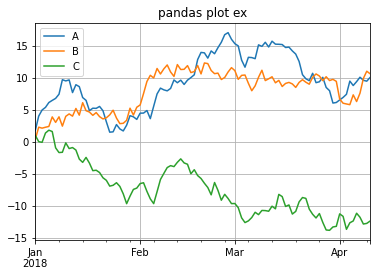

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)
df1=pd.DataFrame(np.random.randn(100,3),
                index=pd.date_range('1/1/2018',periods=100),
                columns=['A','B','C']).cumsum() #cumsum - 누적합
df1.plot(grid=True) # plot(kind=?)로 여러가지 플롯 재현 가능
# bar | pie | hist | kde | box | scatter | area -> plot.?()로도 가능
plt.title('pandas plot ex')
plt.show()

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) mis

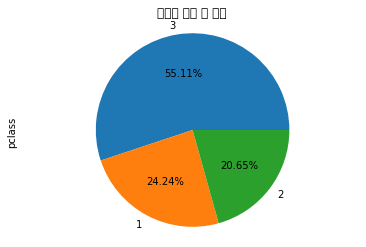

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing 

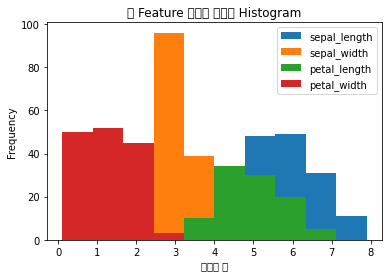

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


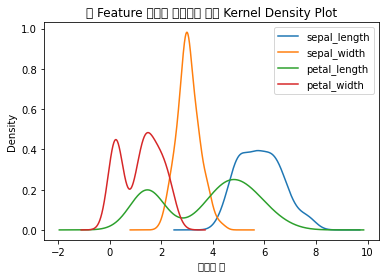

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing 

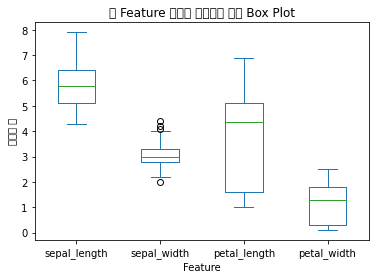

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing 

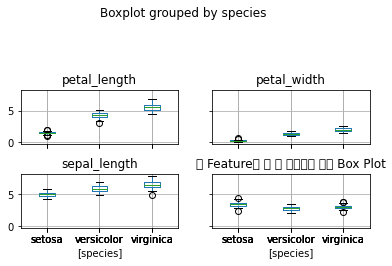

In [47]:
# 여러 플롯 예제
import seaborn as sns
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')

# pie
df3 = titanic.pclass.value_counts()
df3.plot.pie(autopct='%.2f%%')
plt.title("선실별 승객 수 비율")
plt.axis('equal')
plt.show()

# hist
iris.plot.hist()
plt.title("각 Feature 값들의 빈도수 Histogram")
plt.xlabel("데이터 값")
plt.show()

# kde
iris.plot.kde()
plt.title("각 Feature 값들의 빈도수에 대한 Kernel Density Plot")
plt.xlabel("데이터 값")
plt.show()

# box
iris.plot.box()
plt.title("각 Feature 값들의 빈도수에 대한 Box Plot")
plt.xlabel("Feature")
plt.ylabel("데이터 값")
plt.show()
# boxplot 고급
iris.boxplot(by='species')
plt.tight_layout(pad=3, h_pad=1)
plt.title("각 Feature의 종 별 데이터에 대한 Box Plot")
plt.show()